In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import numpy as np
import seaborn as sns
from matplotlib import rcParams

In [2]:
# Create directory 'figs' if it doesn't exist
import os
if not os.path.exists('figs'):
    os.makedirs('figs')

In [3]:
print(plt.rcParams["font.sans-serif"])
print(plt.rcParams["font.monospace"])
print(plt.rcParams["font.family"])

['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']
['sans-serif']


In [4]:
# read csv file
data = pd.read_csv("outputs_wj.csv")
data.head()

,Param,Prime,Step,Compile Time,Setup Time,Witness Time,Proof Time,Verify Time,Proof Size,Proving Key Size,Verification Key Size,Witness Size
0,16,137,20,5.131562,9.136341,2.097409,6.441221,0.008464,11283,295399984,24713,28536328
1,16,139,20,5.074702,10.924390,2.215466,6.635905,0.007334,11283,295399984,24713,28536328
2,16,149,20,4.659964,9.114006,2.063312,6.595985,0.007019,11283,295399984,24713,28536328
3,16,151,20,4.659253,9.125766,2.221284,6.819334,0.007009,11283,295399984,24713,28536328
4,16,157,20,5.257643,9.910505,2.095757,6.572264,0.007207,11283,295399984,24713,28536328


In [5]:
# check data types
data.dtypes

Param                      int64
Prime                      int64
Step                       int64
Compile Time             float64
Setup Time               float64
Witness Time             float64
Proof Time               float64
Verify Time              float64
Proof Size                 int64
Proving Key Size           int64
Verification Key Size      int64
Witness Size               int64
dtype: object

In [6]:
def clean_data(df):
    # delete rows with NaN values
    df = df.dropna()
    # group by step and param, then calculate the mean of other columns
    df = df.groupby(['Step', 'Param']).mean().reset_index()
    return df

In [7]:
sns.set_theme(style="white", palette=None, font_scale=2.2)

In [8]:
# convert the unit of 'Verify Time' column to milliseconds
data['Verify Time'] = data['Verify Time'] * 1000

In [9]:
# convert the unit of 'Proof Size' and 'Verification Key Size' columns to KB
data['Proof Size'] = data['Proof Size'] / 1024
data['Verification Key Size'] = data['Verification Key Size'] / 1024

In [10]:
# convert the unit of 'Proving Key Size' and 'Witness Size' columns to MB
data['Proving Key Size'] = data['Proving Key Size'] / (1024*1024)
data['Witness Size'] = data['Witness Size'] / (1024*1024)

In [11]:
data = clean_data(data)
data.head()

,Step,Param,Prime,Compile Time,Setup Time,Witness Time,Proof Time,Verify Time,Proof Size,Proving Key Size,Verification Key Size,Witness Size
0,20,16,159.6,5.054726,9.770305,2.163078,6.753926,7.426704,11.018555,281.715378,24.133789,27.214363
1,20,256,159.6,5.313357,10.109711,2.163551,6.921669,7.328460,11.018555,281.715378,24.133789,27.214363
2,20,65536,159.6,4.966443,9.498664,2.085483,6.703673,7.688345,11.018555,281.715378,24.133789,27.214363
3,30,16,159.6,8.169014,15.501549,3.311199,10.852507,7.310963,16.077148,459.585617,35.344727,41.448143
4,30,256,159.6,7.756844,14.609847,3.247495,10.578353,7.717153,16.077148,459.585617,35.344727,41.448143


In [12]:
# print the name of the columns
print(data.columns)

Index(['Step', 'Param', 'Prime', 'Compile Time', 'Setup Time', 'Witness Time',
       'Proof Time', 'Verify Time', 'Proof Size', 'Proving Key Size',
       'Verification Key Size', 'Witness Size'],
      dtype='object')


In [13]:
# select the column that we want to plot, generate a new dataframe
# the columns of the new dataframe are 'Step', '2**16', '2**4', '2**8'
def data_for_plot(df, column):
    data = df[['Step', 'Param', column]]
    data = data.pivot('Step', 'Param', column)
    # use new column names
    data.columns = ['2**16', '2**4', '2**8']
    # the index is the 'Step' column
    data = data.reset_index()
    
    return data

In [14]:
# set a list of title
titles = [
    "Compile Time",
    "Setup Phase Time",
    "Compute Witness Time",
    "Generate Proof Time",
    "Verify Proof Time",
    "Proof Size",
    "Proving Key Size",
    "Verifying Key Size",
    "Witness Size"
]

In [15]:
# Compile Time	Setup Time	Witness Time	Proof Time	Verify Time	Proof Size	Proving Key Size	Verification Key Size	Witness Size
data_compile_time = data_for_plot(data, 'Compile Time')
data_setup_time = data_for_plot(data, 'Setup Time')
data_witness_time = data_for_plot(data, 'Witness Time')
data_proof_time = data_for_plot(data, 'Proof Time')
data_verify_time = data_for_plot(data, 'Verify Time')
data_proof_size = data_for_plot(data, 'Proof Size')
data_proving_key_size = data_for_plot(data, 'Proving Key Size')
data_verification_key_size = data_for_plot(data, 'Verification Key Size')
data_witness_size = data_for_plot(data, 'Witness Size')

/tmp/ipykernel_2289/3208265097.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data = data.pivot('Step', 'Param', column)
/tmp/ipykernel_2289/3208265097.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data = data.pivot('Step', 'Param', column)
/tmp/ipykernel_2289/3208265097.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data = data.pivot('Step', 'Param', column)
/tmp/ipykernel_2289/3208265097.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data = data.pivot('Step', 'Param', column)
/tmp/ipykernel_2289/3208265097.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data = data.pivot('Step', 'Param', column)
/tmp/ipykernel_2289/3208265097.py:5: FutureWarning: In a future version of pandas all argu

In [16]:
# define a function to plot the data

def plot_time_bar(df, title):
    df_melted = df.melt(id_vars=["Step"], var_name='Quantization Size', value_name=title)
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Step', y=title, hue='Quantization Size', data=df_melted, palette="bright")
    for i, x_label in enumerate(ax.get_xticklabels()):
        if i % 2 == 0:
            x_label.set_visible(True)
        else:
            x_label.set_visible(False)
    plt.xlabel('Episode')
    plt.ylabel(title+' (s)')
    plt.legend(title='Quantization Size')
    plt.tight_layout()
    plt.savefig('./figs/'+title+'_bar.pdf', format='pdf')
    plt.show()

In [17]:
def plot_time_line(df, title):
    df_melted = df.melt(id_vars=["Step"], var_name='Quantization Size', value_name=title)
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Step', y=title, hue='Quantization Size',data=df_melted, marker='o',palette='bright')
    plt.xlabel('Episode')
    plt.ylabel(title+' (s)')
    plt.legend(title='Quantization Size')
    plt.tight_layout()
    plt.savefig('./figs/'+title+'_line.pdf', format='pdf')
    plt.show()

In [18]:
def plot_size_bar_kb(df, title):
    df_melted = df.melt(id_vars=["Step"], var_name='Quantization Size', value_name=title)
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Step', y=title, hue='Quantization Size', data=df_melted,palette="bright")
    for i, x_label in enumerate(ax.get_xticklabels()):
        if i % 2 == 0:
            x_label.set_visible(True)
        else:
            x_label.set_visible(False)
    plt.xlabel('Episode')
    plt.ylabel(title+' (KB)')
    plt.legend(title='Quantization Size')
    plt.tight_layout()
    plt.savefig('./figs/'+title+'_bar.pdf', format='pdf')
    plt.show()

In [19]:
def plot_size_bar_mb(df, title):
    df_melted = df.melt(id_vars=["Step"], var_name='Quantization Size', value_name=title)
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Step', y=title, hue='Quantization Size', data=df_melted,palette="bright")
    for i, x_label in enumerate(ax.get_xticklabels()):
        if i % 2 == 0:
            x_label.set_visible(True)
        else:
            x_label.set_visible(False)
    plt.xlabel('Episode')
    plt.ylabel(title+' (MB)')
    plt.legend(title='Quantization Size')
    plt.tight_layout()
    plt.savefig('./figs/'+title+'_bar.pdf', format='pdf')
    plt.show()

In [20]:
def plot_size_line_kb(df, title):
    df_melted = df.melt(id_vars=["Step"], var_name='Quantization Size', value_name=title)
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Step', y=title, hue='Quantization Size',data=df_melted, marker='o',palette='bright')
    plt.xlabel('Episode')
    plt.ylabel(title+' (KB)')
    plt.legend(title='Quantization Size')
    plt.tight_layout()
    plt.savefig('./figs/'+title+'_line.pdf', format='pdf')
    plt.show()

In [21]:
def plot_size_line_mb(df, title):
    df_melted = df.melt(id_vars=["Step"], var_name='Quantization Size', value_name=title)
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Step', y=title, hue='Quantization Size',data=df_melted, marker='o',palette='bright')
    plt.xlabel('Episode')
    plt.ylabel(title+' (MB)')
    plt.legend(title='Quantization Size')
    plt.tight_layout()
    plt.savefig('./figs/'+title+'_line.pdf', format='pdf')
    plt.show()

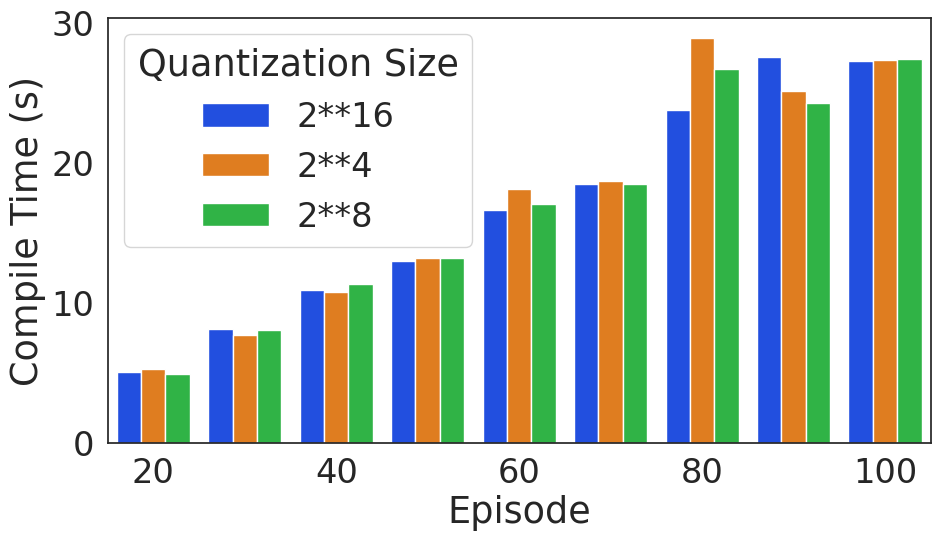

In [22]:
plot_time_bar(data_compile_time, titles[0])

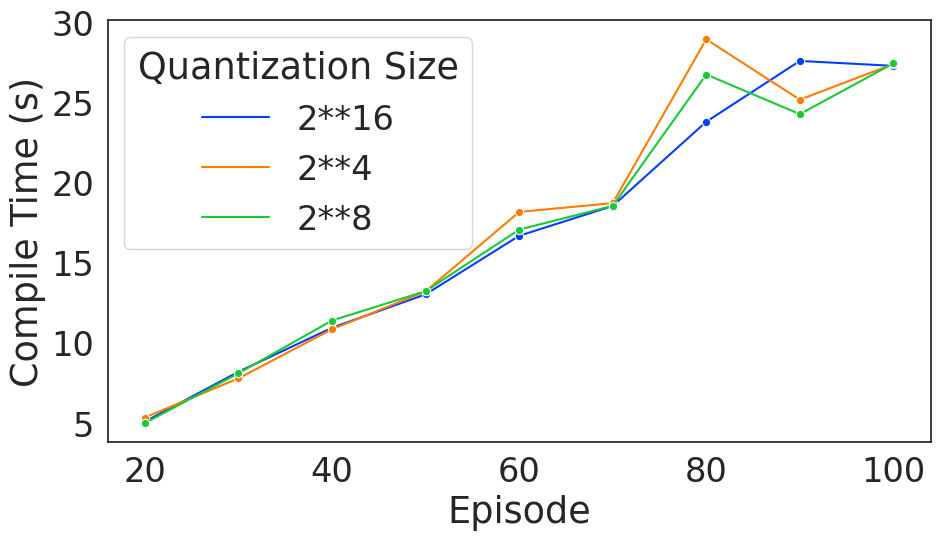

In [23]:
plot_time_line(data_compile_time, titles[0])

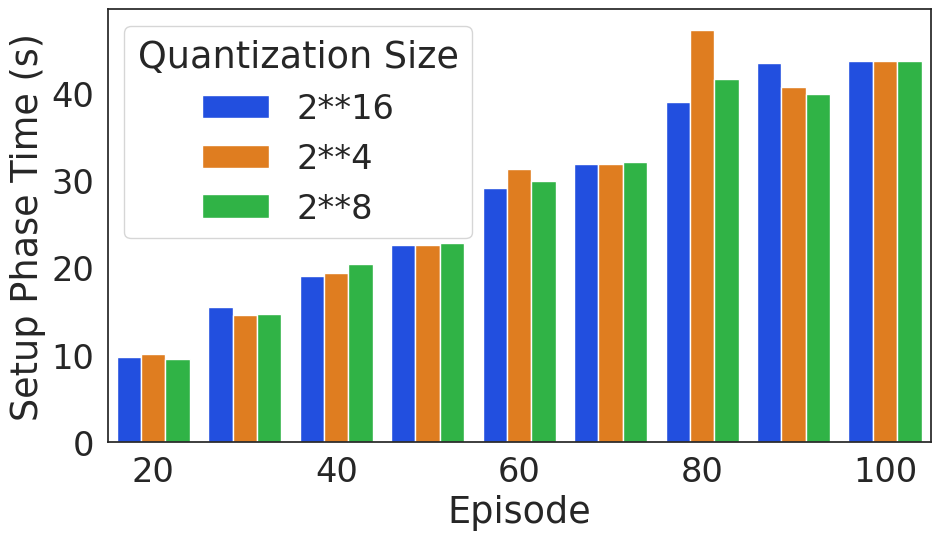

In [24]:
plot_time_bar(data_setup_time, titles[1])

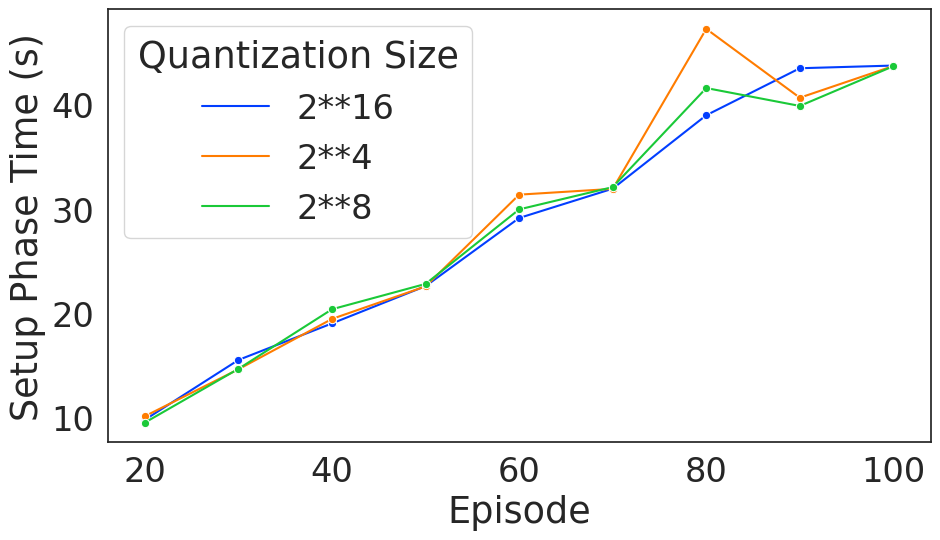

In [25]:
plot_time_line(data_setup_time, titles[1])

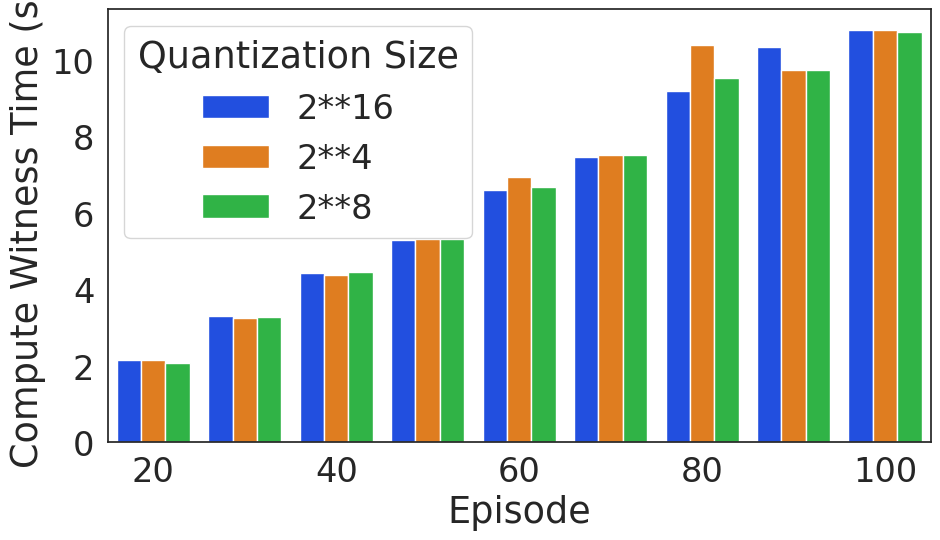

In [26]:
plot_time_bar(data_witness_time, titles[2])

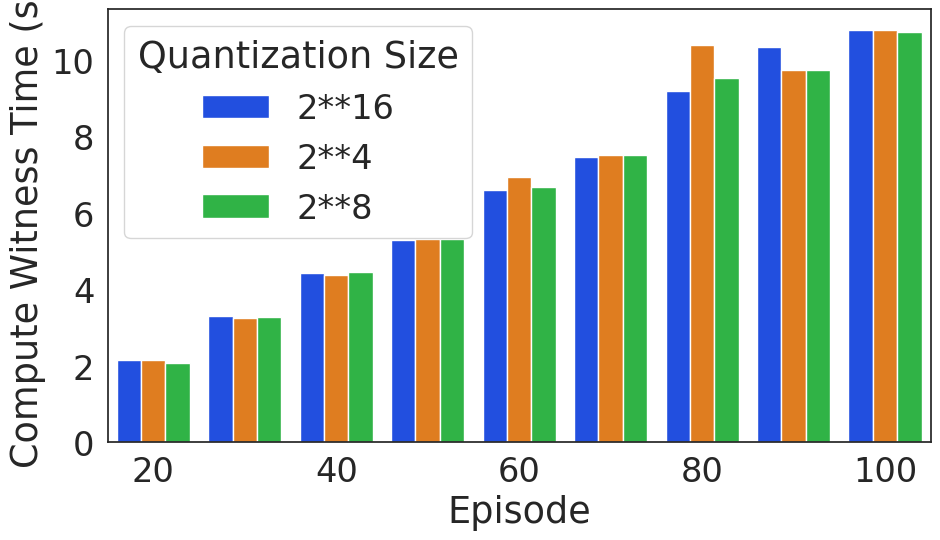

In [27]:
plot_time_bar(data_witness_time, titles[2])

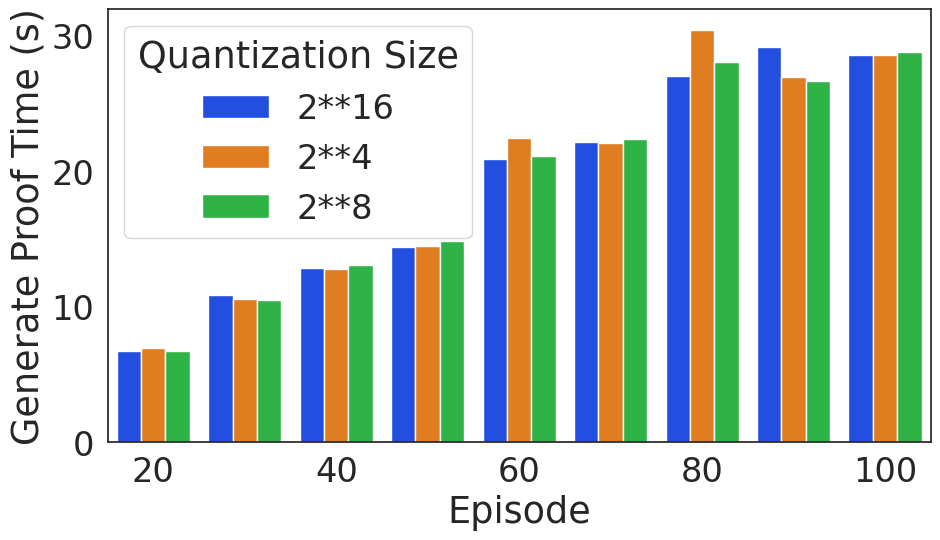

In [28]:
plot_time_bar(data_proof_time, titles[3])

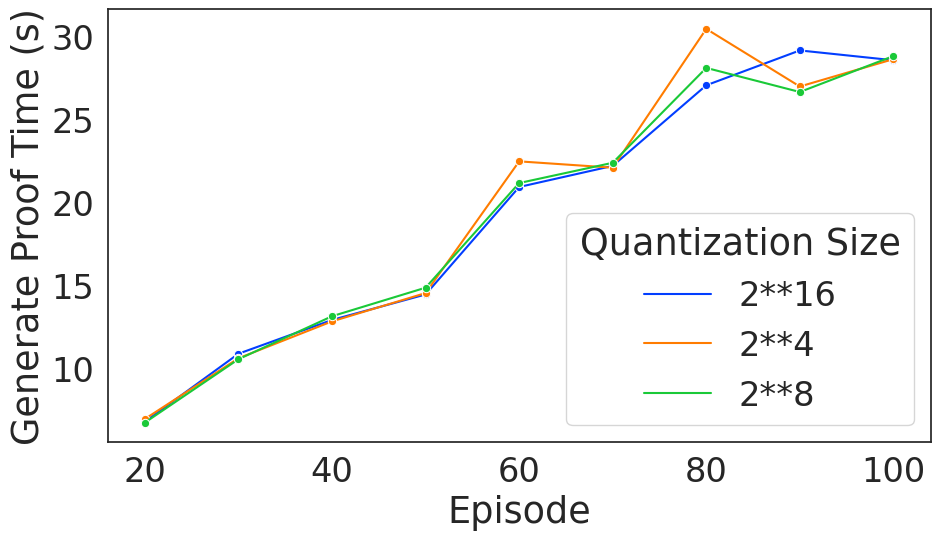

In [29]:
plot_time_line(data_proof_time, titles[3])

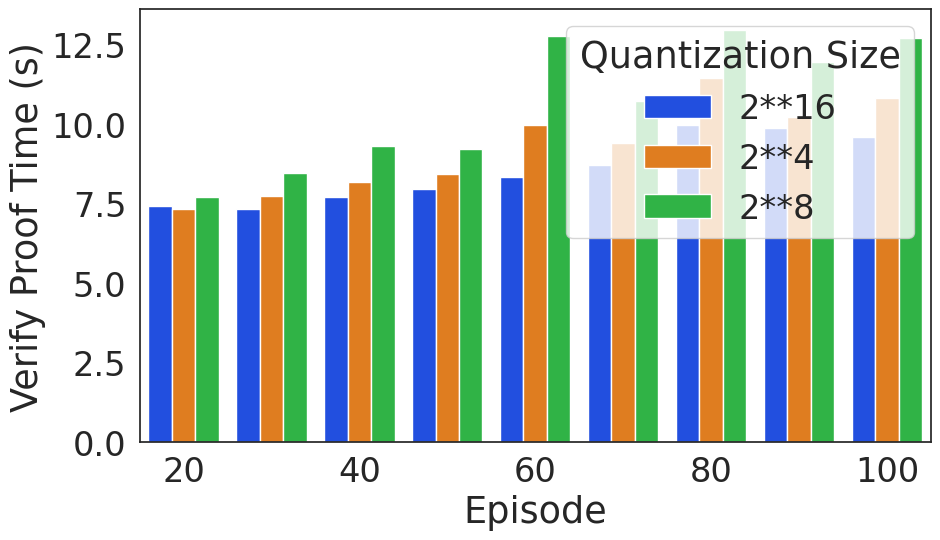

In [30]:
plot_time_bar(data_verify_time, titles[4])

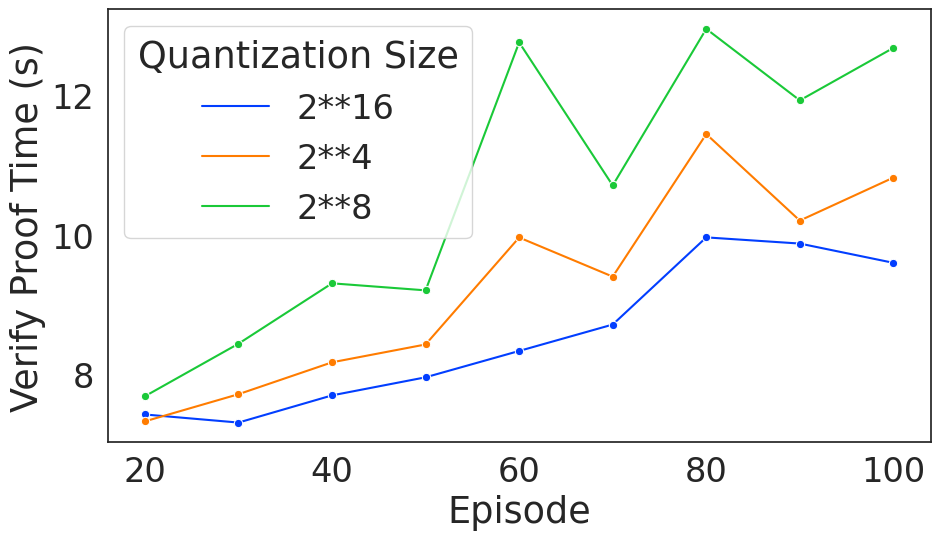

In [31]:
plot_time_line(data_verify_time, titles[4])

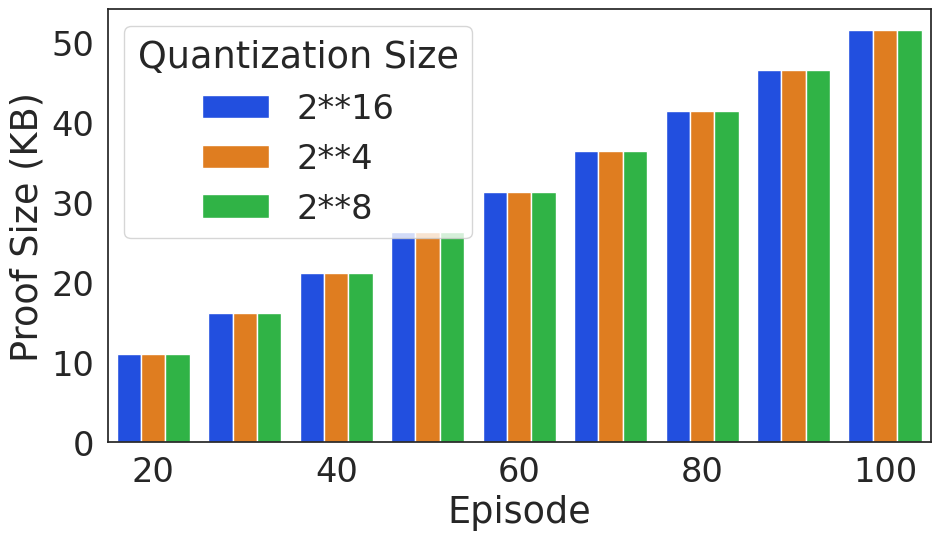

In [32]:
plot_size_bar_kb(data_proof_size, titles[5])

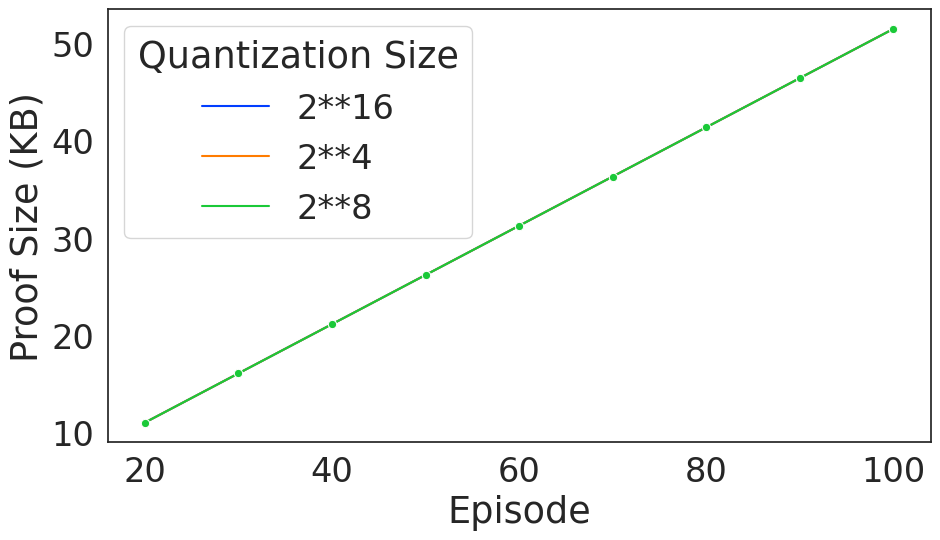

In [33]:
plot_size_line_kb(data_proof_size, titles[5])

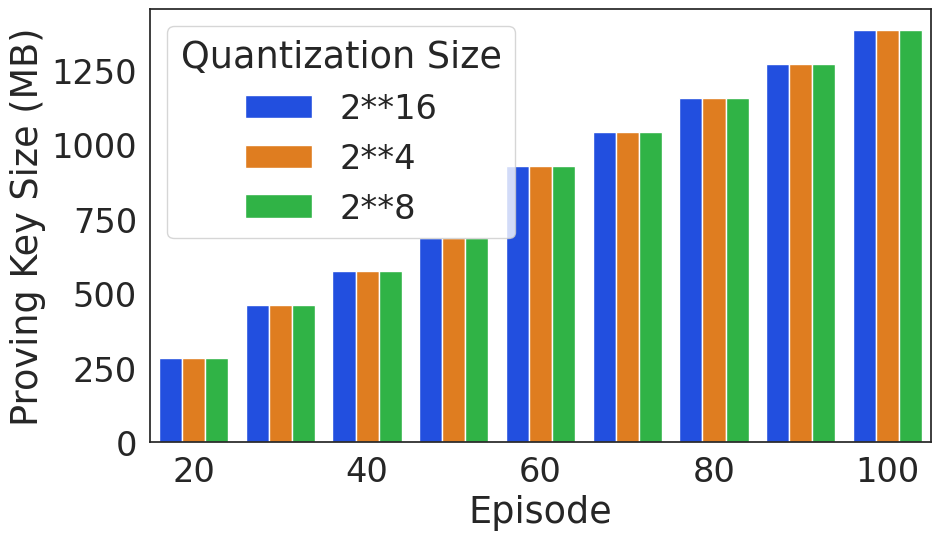

In [34]:
plot_size_bar_mb(data_proving_key_size, titles[6])

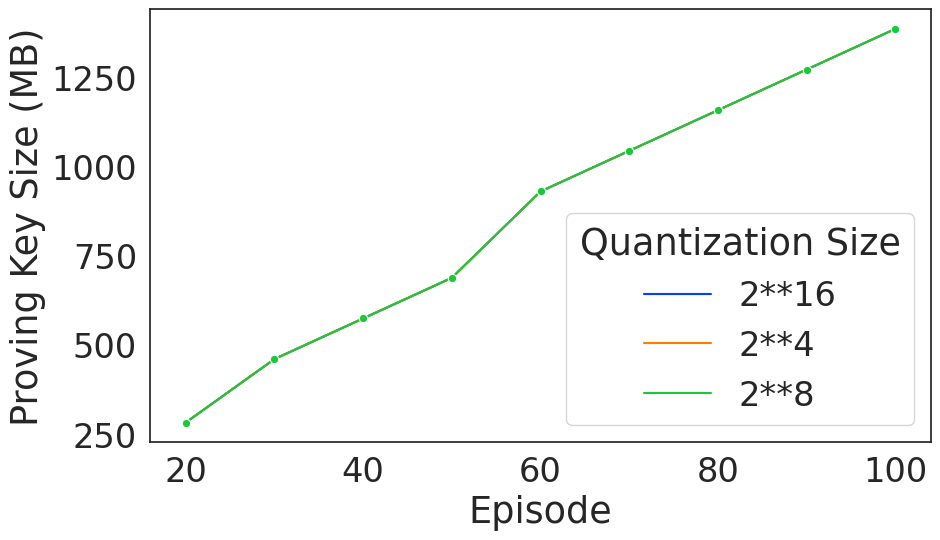

In [35]:
plot_size_line_mb(data_proving_key_size, titles[6])

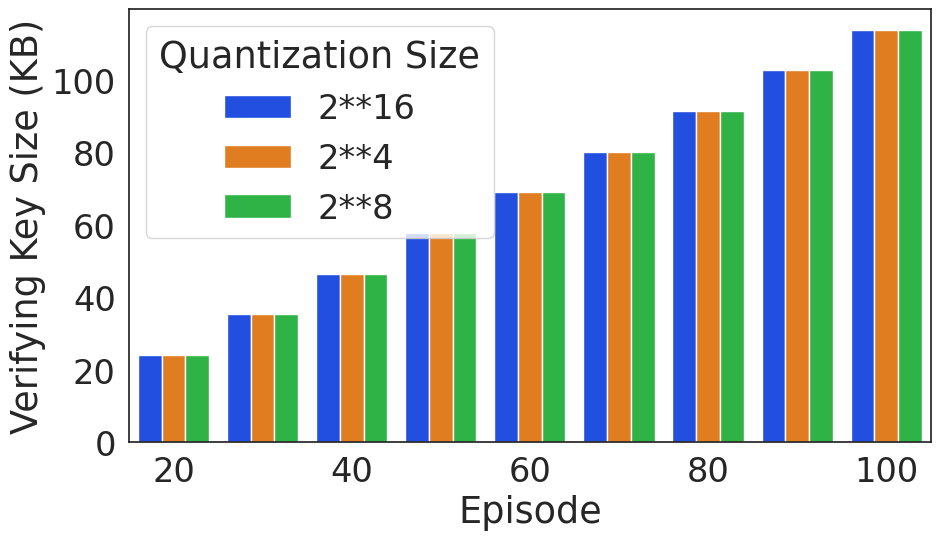

In [36]:
plot_size_bar_kb(data_verification_key_size, titles[7])

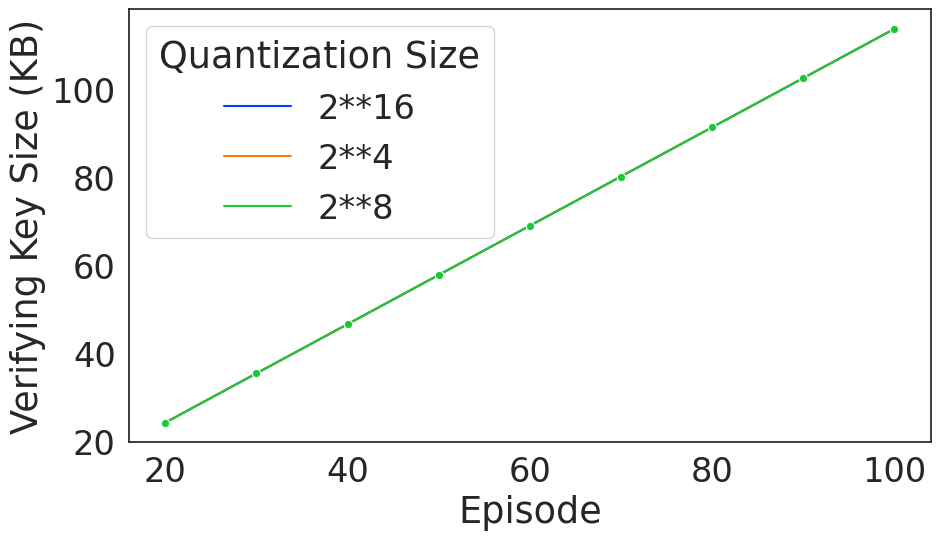

In [37]:
plot_size_line_kb(data_verification_key_size, titles[7])

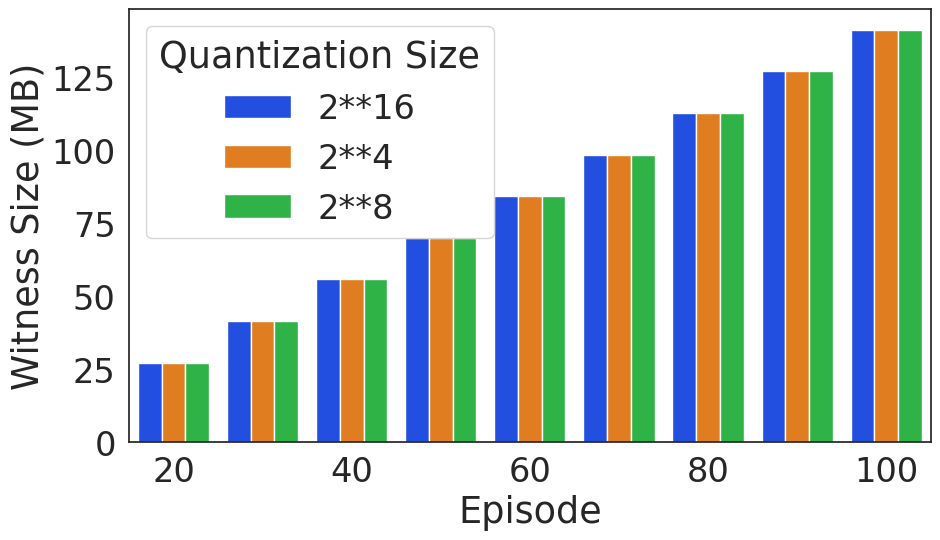

In [38]:
plot_size_bar_mb(data_witness_size, titles[8])

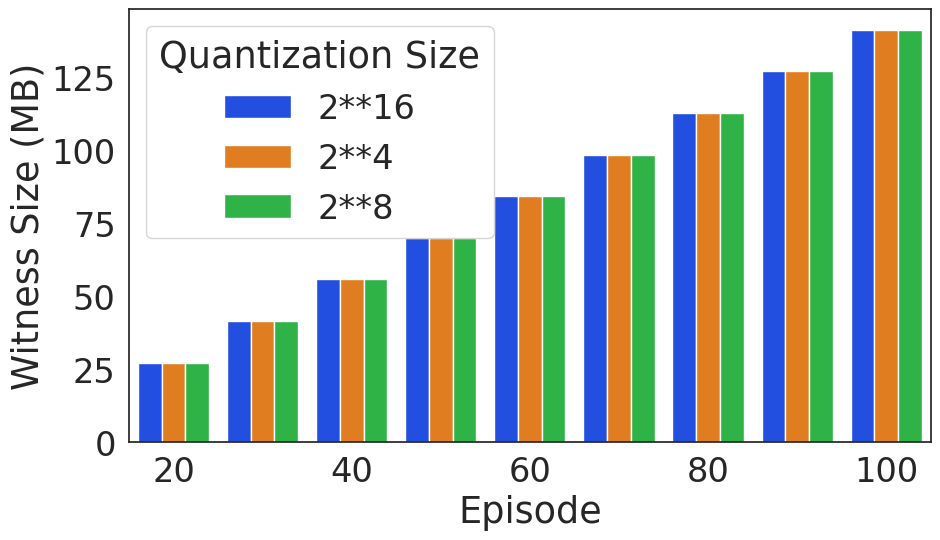

In [39]:
plot_size_bar_mb(data_witness_size, titles[8])